In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
%run -i 'data_pipeline.py'

In [3]:
ratings_df

,movie,critic_score,audience_score,release_date,audience_tomatometer,critic_tomatometer,score_difference
0,The Invisible Man,91,88,"Feb 28, 2020",Fresh,Fresh,-3
1,The Way Back,83,84,"Mar 6, 2020",Fresh,Fresh,1
2,Never Rarely Sometimes Always,99,72,"Mar 13, 2020",Fresh,Fresh,-27
3,Bad Boys for Life,77,96,"Jan 17, 2020",Fresh,Fresh,19
4,Sonic the Hedgehog,64,93,"Feb 14, 2020",Fresh,Fresh,29
...,...,...,...,...,...,...,...
3574,Meet The Mormons,18,89,"Oct 10, 2014",Fresh,Rotten,71
3575,Mad As Hell,27,84,"Feb 6, 2015",Fresh,Rotten,57
3576,Out Of The Dark,24,23,"Feb 27, 2015",Rotten,Rotten,-1
3577,The Big Day (Jour De Fete),100,83,"Feb 19, 1952",Fresh,Fresh,-17


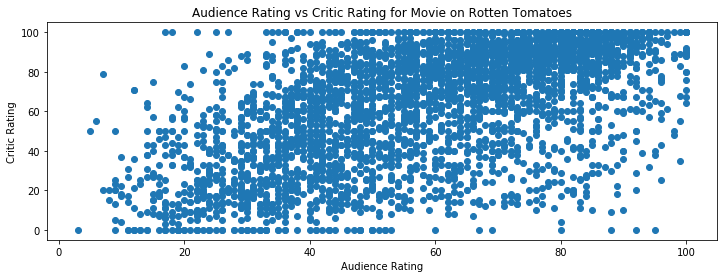

In [4]:
fig, ax = plt.subplots(1,1,figsize=(12,4))

ax.scatter(ratings_df['audience_score'],ratings_df['critic_score'])
ax.set_xlabel('Audience Rating')
ax.set_ylabel('Critic Rating')
ax.set_title('Audience Rating vs Critic Rating for Movie on Rotten Tomatoes')
plt.savefig('audience_vs_critic_rating.png')

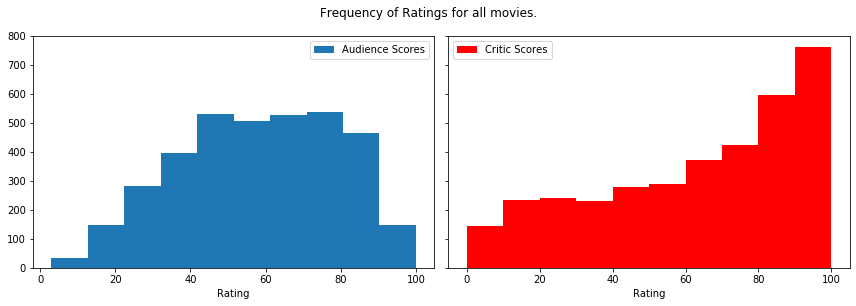

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

ax[0].hist(ratings_df['audience_score'],bins=10,label="Audience Scores")
ax[1].hist(ratings_df['critic_score'],bins=10,label="Critic Scores",color='r')
for i in range(2):
    ax[i].legend()
    ax[i].set_xlabel('Rating')

plt.suptitle('Frequency of Ratings for all movies.',x= 0.5,y=1.05)
plt.tight_layout()
plt.savefig('audience_and_critic_ratings_histograms.png')

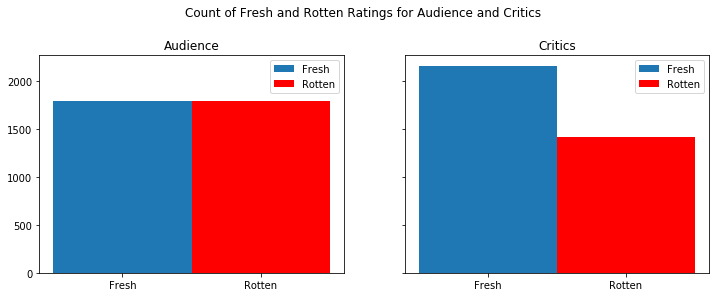

In [6]:
fig, ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

ax[0].hist(ratings_df['audience_tomatometer'][ratings_df['audience_tomatometer']=='Fresh'],bins=1,label="Fresh")
ax[0].hist(ratings_df['audience_tomatometer'][ratings_df['audience_tomatometer']=='Rotten'],bins=1,label="Rotten",color='r')
ax[0].legend()
ax[0].set_title('Audience')

ax[1].hist(ratings_df['critic_tomatometer'][ratings_df['critic_tomatometer']=='Fresh'],bins=1,label="Fresh")
ax[1].hist(ratings_df['critic_tomatometer'][ratings_df['critic_tomatometer']=='Rotten'],bins=1,label="Rotten",color='r')
ax[1].legend()
ax[1].set_title('Critics')

plt.suptitle('Count of Fresh and Rotten Ratings for Audience and Critics',x=0.5,y=1.05)
plt.savefig('fresh_vs_rotten.png')

In [7]:
avg_rating = pd.DataFrame()
avg_rating_idx=['Critics','Audience']
avg_rating['Group']=avg_rating_idx
avg_rating['Average_Rating']= ratings_df['critic_score'].aggregate('average'),ratings_df['audience_score'].aggregate('average')
avg_rating

,Group,Average_Rating
0,Critics,63.301766
1,Audience,59.702247


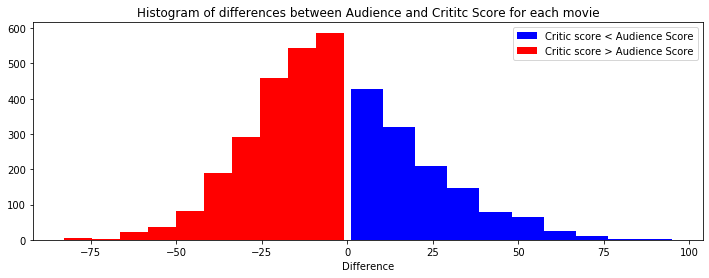

In [7]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.hist(ratings_df['score_difference'][ratings_df['score_difference']>0],color='b',label=('Critic score < Audience Score'))
ax.hist(ratings_df['score_difference'][ratings_df['score_difference']<0],color='r',label=('Critic score > Audience Score'))
ax.set_xlabel('Difference')
ax.legend()
ax.set_title("Histogram of differences between Audience and Crititc Score for each movie")
plt.savefig('score_diff_hist.png')

In [9]:
diff_count = pd.DataFrame()
groupings=['Critic Score > Audience Score','Critic Score = Audience Score','Critic Score < Audience Score']
diff_count['Group']=groupings
diff_count['Count']= ratings_df['score_difference'][ratings_df['score_difference']<0].count(),ratings_df['score_difference'][ratings_df['score_difference']==0].count(),ratings_df['score_difference'][ratings_df['score_difference']>0].count()
diff_count

,Group,Count
0,Critic Score > Audience Score,1503
1,Critic Score = Audience Score,51
2,Critic Score < Audience Score,938


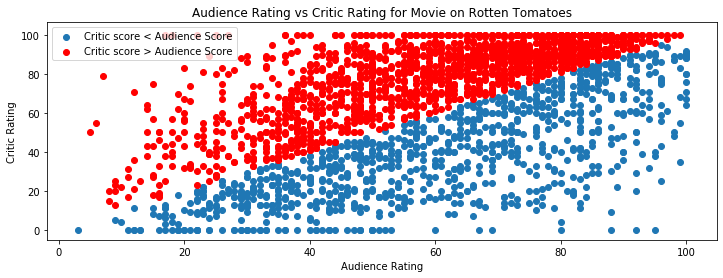

In [10]:
fig, ax = plt.subplots(1,1,figsize=(12,4))

ax.scatter(ratings_df['audience_score'][ratings_df['score_difference']>0],ratings_df['critic_score'][ratings_df['score_difference']>0],label='Critic score < Audience Score')
ax.scatter(ratings_df['audience_score'][ratings_df['score_difference']<0],ratings_df['critic_score'][ratings_df['score_difference']<0],color='r',label='Critic score > Audience Score')
ax.set_xlabel('Audience Rating')
ax.set_ylabel('Critic Rating')
ax.set_title('Audience Rating vs Critic Rating for Movie on Rotten Tomatoes')
ax.legend()